# Projeto Crimes em SP

## Hipóteses:

* Bairros com menor renda de sp tem um maior número de homicídios consumados.

* Homicídios ocorrem com maior frequência a noite e em locares abertos

## TODO

* Classificar as cidades periféricas (modelo de classificação)

* Período da ocorrência (mais de noite, dia, tarde)

* Top bairros com mais ocorrência

* Locais que acontece mais (casa, estradas)

* Evolução histórica versus geográfica (Top bairros)

* Correlacionar com dados pessoais (Idade, sexo, cor)



In [61]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

homicidio_doloso = pd.read_csv(r"C:\Users\Lenovo\Downloads\Homicidio Doloso.csv\Homicidio Doloso Data SSP.csv", sep=";", encoding="latin-1", low_memory=False)

# Selecionando e Limpando os dados

In [62]:
print(homicidio_doloso.shape)
homicidio_doloso.info()

(147033, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147033 entries, 0 to 147032
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ANO_BO                    147033 non-null  int64  
 1   NUM_BO                    147033 non-null  int64  
 2   NUMERO_BOLETIM            147033 non-null  object 
 3   BO_INICIADO               147033 non-null  object 
 4   BO_EMITIDO                147033 non-null  object 
 5   DATAOCORRENCIA            147033 non-null  object 
 6   HORAOCORRENCIA            137444 non-null  object 
 7   PERIDOOCORRENCIA          147033 non-null  object 
 8   DATACOMUNICACAO           147033 non-null  object 
 9   DATAELABORACAO            147033 non-null  object 
 10  BO_AUTORIA                147033 non-null  object 
 11  FLAGRANTE                 147033 non-null  object 
 12  NUMERO_BOLETIM_PRINCIPAL  26816 non-null   object 
 13  LOGRADOURO                11643

In [63]:
homicidio = homicidio_doloso[["ANO_BO", "NUM_BO", "HORAOCORRENCIA", "PERIDOOCORRENCIA", "BAIRRO", "CIDADE", "UF", "DESCRICAOLOCAL", "FLAGRANTE", "STATUS"]]
homicidio = homicidio.rename(columns={
    "ANO_BO": "ANO",
    "HORAOCORRENCIA": "HORA",
    "PERIDOOCORRENCIA": "PERIODO",
    "BAIRRO": "BAIRRO",
    "DESCRICAOLOCAL": "LOCAL",
    })
sexo = homicidio_doloso[["ANO_BO", "NUM_BO", "SEXO"]]

idade = homicidio_doloso[["ANO_BO", "NUM_BO", "IDADE"]]

cor = homicidio_doloso[["ANO_BO", "NUM_BO", "CORCUTIS"]]

In [64]:
print(homicidio.isna().sum())
print(sexo.isna().sum())
print(idade.isna().sum())
print(cor.isna().sum())
homicidio.dropna(inplace=True)
sexo.dropna(inplace=True)
idade.dropna(inplace=True)
cor.dropna(inplace=True)

ANO             0
NUM_BO          0
HORA         9589
PERIODO         0
BAIRRO       9109
CIDADE        453
UF            453
LOCAL           0
FLAGRANTE       0
STATUS       3964
dtype: int64
ANO_BO        0
NUM_BO        0
SEXO      93228
dtype: int64
ANO_BO         0
NUM_BO         0
IDADE     101519
dtype: int64
ANO_BO          0
NUM_BO          0
CORCUTIS    92313
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8104\3086957484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexo.dropna(inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8104\3086957484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idade.dropna(inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8104\3086957484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor.dropna(inplace=True)


In [65]:
print(homicidio.duplicated().sum())
print(sexo.duplicated().sum())
print(idade.duplicated().sum())
print(cor.duplicated().sum())
homicidio.drop_duplicates(inplace=True)
sexo.drop_duplicates(inplace=True)
idade.drop_duplicates(inplace=True)
cor.drop_duplicates(inplace=True)

49832
29932
17083
26743


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8104\4289532399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexo.drop_duplicates(inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8104\4289532399.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idade.drop_duplicates(inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8104\4289532399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor.drop_duplicates(inplace=T

In [66]:
print(homicidio.shape)
print(sexo.shape)
print(idade.shape)
print(cor.shape)
homicidio

(75805, 10)
(23873, 3)
(28431, 3)
(27977, 3)


,ANO,NUM_BO,HORA,PERIODO,BAIRRO,CIDADE,UF,LOCAL,FLAGRANTE,STATUS
0,2021,3652,11:43,PELA MANHÃ,BAIRRO DO RIBEIRO,LINS,SP,Residência,Sim,Consumado
2,2021,4134,23:30,A NOITE,Parque Brasil,S.PAULO,SP,Via pública,Não,Consumado
3,2021,343,16:30,A TARDE,LIBERDADE,S.PAULO,SP,Via pública,Não,Consumado
7,2021,4136,23:30,A NOITE,Parque Brasil,S.PAULO,SP,Via pública,Não,Consumado
8,2021,4225,23:00,A NOITE,CUMBICA,GUARULHOS,SP,Via pública,Não,Consumado
...,...,...,...,...,...,...,...,...,...,...
147024,2003,331,22:00,A NOITE,SACOMA,S.PAULO,SP,Residência,Não,Tentado
147025,2003,393,03:00,DE MADRUGADA,PQ. INDUSTRIAL,CAMPINAS,SP,Via pública,Não,Consumado
147026,2003,781,21:15,A NOITE,BROOKLIN,S.PAULO,SP,Via pública,Não,Consumado
147028,2003,555,19:00,A NOITE,JAGUARÉ,S.PAULO,SP,Via pública,Não,Consumado


In [67]:
homicidio_UF = homicidio[homicidio["UF"] != "SP"]
print(homicidio_UF.shape)
homicidio = homicidio.drop(homicidio_UF.index)
homicidio.shape

(1, 10)


(75804, 10)

In [68]:
# pd.set_option('display.max.rows', 75804)
homicidio.head()

,ANO,NUM_BO,HORA,PERIODO,BAIRRO,CIDADE,UF,LOCAL,FLAGRANTE,STATUS
0,2021,3652,11:43,PELA MANHÃ,BAIRRO DO RIBEIRO,LINS,SP,Residência,Sim,Consumado
2,2021,4134,23:30,A NOITE,Parque Brasil,S.PAULO,SP,Via pública,Não,Consumado
3,2021,343,16:30,A TARDE,LIBERDADE,S.PAULO,SP,Via pública,Não,Consumado
7,2021,4136,23:30,A NOITE,Parque Brasil,S.PAULO,SP,Via pública,Não,Consumado
8,2021,4225,23:00,A NOITE,CUMBICA,GUARULHOS,SP,Via pública,Não,Consumado


# Organizando os dados

In [69]:
pd.set_option('display.max.rows', 3654)

In [70]:
homicidio_consumado = homicidio[homicidio["STATUS"] == "Consumado"]
homicidio_tentado = homicidio[homicidio["STATUS"] == "Tentado"]


In [71]:
anos_consumado = homicidio_consumado.groupby("ANO").count()
anos_tentado = homicidio_tentado.groupby("ANO").count()
soma_homicidios = anos_consumado["NUM_BO"].sum()
soma_tentado = anos_tentado["NUM_BO"].sum()

In [72]:
# periodo = homicidio.groupby(["PERIODO", "LOCAL"]).count()
# locais_abertos = ['Via pública', 'Rodovia/Estrada', 'Área não ocupada', 'Lazer e recreação', 'Unidade rural', 'Terminal/Estação', 'Favela',  'Estrada de ferro']
# locais_fechados = ['Residência', 'Comércio e serviços', 'Saúde', 'Condomínio Residencial', 'Repartição Pública', 'Restaurante e afins', 'Estabelecimento de ensino', 'Hospedagem', 'Centro Comercial/Empresarial', 'Serviços e bens públicos', 'Templo e afins', 'Condomínio Comercial', 'Local clandestino/ilegal', 'Estabelecimento industrial', 'Estabelecimento prisional', 'Estabelecimento bancário', 'Shopping Center', 'Sindicato', 'Entidade assistencial', 'Escritório']
local = homicidio_consumado.groupby("LOCAL").count().sort_values(by="ANO", ascending=False)
periodo = homicidio_consumado.groupby("PERIODO").count().sort_values(by="ANO", ascending=False)
periodo

,ANO,NUM_BO,HORA,BAIRRO,CIDADE,UF,LOCAL,FLAGRANTE,STATUS
PERIODO,,,,,,,,,
A NOITE,26680,26680,26680,26680,26680,26680,26680,26680,26680
DE MADRUGADA,16271,16271,16271,16271,16271,16271,16271,16271,16271
PELA MANHÃ,13603,13603,13603,13603,13603,13603,13603,13603,13603
A TARDE,11553,11553,11553,11553,11553,11553,11553,11553,11553
EM HORA INCERTA,250,250,250,250,250,250,250,250,250


In [73]:
cidade_sp = homicidio_consumado[homicidio_consumado["CIDADE"] == "S.PAULO"]
bairros = cidade_sp.groupby("BAIRRO").count().sort_values(by="NUM_BO", ascending=False)
# TOP 10 BAIRROS COM MAIOR TAXA DE HOMICIDIO
# GRAJAU
# CAMPO LIMPO
# ITAIM PAULISTA
# ITAQUERA
# JARDIM ANGELA
# JD SÃO LUIS
# BRASILANDIA
# CAPAO REDONDO
# CIDADE TIRADENTES
# PIRITUBA

In [74]:
# bairros_sp = cidade_sp["BAIRRO"].unique()
# for i in bairros_sp:
#     print(i)

In [75]:
centro_bairros = ["Sé Bela Vista", "Bom Retiro", "Cambuci", "Consolação", "Liberdade", "República", "Santa Cecília", "Sé", "Centro"]
def maiuscula(lista):
    i = 0
    for bairro in lista:
        lista[i] = bairro.upper()
        i += 1
    zona = cidade_sp[cidade_sp["BAIRRO"].isin(lista)]
    zona_hom = zona.groupby("BAIRRO").count().sort_values(by="ANO", ascending=False)
    return zona, zona_hom
centro, centro_hom = maiuscula(centro_bairros)

In [76]:
sul_bairros = ["Campo Limpo", "Capão Redondo", "Vila Andrade", "Capela do Socorro Cidade Dutra", "Grajau", "Socorro", "Cidade Ademar", "Pedreira", "Ipiranga", "Sacomã", "Jabaquara", "M'Boi Mirim", "Jardim Ângela", "Jardim São Luís", "Parelheiros", "Marsilac", "Santo Amaro", "Campo Belo", "Campo Grande", "Santo Amaro", "Moema", "Saúde", "Vila Mariana"]
sul, sul_hom = maiuscula(sul_bairros)
sul_hom

,ANO,NUM_BO,HORA,PERIODO,CIDADE,UF,LOCAL,FLAGRANTE,STATUS
BAIRRO,,,,,,,,,
GRAJAU,369,369,369,369,369,369,369,369,369
CAMPO LIMPO,357,357,357,357,357,357,357,357,357
PARELHEIROS,203,203,203,203,203,203,203,203,203
JABAQUARA,202,202,202,202,202,202,202,202,202
PEDREIRA,182,182,182,182,182,182,182,182,182
CIDADE ADEMAR,177,177,177,177,177,177,177,177,177
IPIRANGA,146,146,146,146,146,146,146,146,146
VILA ANDRADE,138,138,138,138,138,138,138,138,138
SANTO AMARO,120,120,120,120,120,120,120,120,120


In [77]:
leste_bairros = ["Aricanduva", "Carrão", "Vila Formosa", "Cidade Tiradentes", "Ermelino Matarazzo", "Ponte Rasa", "Guaianases", "Lajeado", "Itaim Paulista", "Vila Curuçá", "Itaquera", "Cidade Líder", "José Bonifácio", "Parque do Carmo", "Mooca Água Rasa", "Belém", "Brás", "Moóca", "Pari", "Tatuapé", "Penha", "Artur Alvim", "Cangaíba", "Penha", "Vila Matilde", "São Mateus", "São Rafael", "São Miguel", "Jardim Helena", "Vila Jacuí", "Sapopemba", "Vila Prudente", "São Lucas"]
leste, leste_hom = maiuscula(leste_bairros)
leste_hom

,ANO,NUM_BO,HORA,PERIODO,CIDADE,UF,LOCAL,FLAGRANTE,STATUS
BAIRRO,,,,,,,,,
ITAIM PAULISTA,348,348,348,348,348,348,348,348,348
ITAQUERA,348,348,348,348,348,348,348,348,348
CIDADE TIRADENTES,231,231,231,231,231,231,231,231,231
SAPOPEMBA,214,214,214,214,214,214,214,214,214
GUAIANASES,209,209,209,209,209,209,209,209,209
ERMELINO MATARAZZO,149,149,149,149,149,149,149,149,149
LAJEADO,138,138,138,138,138,138,138,138,138
JARDIM HELENA,123,123,123,123,123,123,123,123,123
PENHA,113,113,113,113,113,113,113,113,113


In [78]:
norte_bairros = ["Casa Verde", "Cachoeirinha", "Limão", "Brasilândia", "Freguesia do Ó", "Jaçanã", "Tremembé", "Perus", "Anhanguera", "Pirituba", "Jaraguá", "São Domingos", "Santana", "Tucuruvi", "Mandaqui", "Vila Maria", "Vila Guilherme", "Vila Medeiros"]
norte, norte_hom = maiuscula(norte_bairros)
norte_hom

,ANO,NUM_BO,HORA,PERIODO,CIDADE,UF,LOCAL,FLAGRANTE,STATUS
BAIRRO,,,,,,,,,
PIRITUBA,221,221,221,221,221,221,221,221,221
PERUS,200,200,200,200,200,200,200,200,200
VILA MARIA,174,174,174,174,174,174,174,174,174
CACHOEIRINHA,173,173,173,173,173,173,173,173,173
VILA MEDEIROS,114,114,114,114,114,114,114,114,114
CASA VERDE,90,90,90,90,90,90,90,90,90
SANTANA,79,79,79,79,79,79,79,79,79
MANDAQUI,61,61,61,61,61,61,61,61,61
VILA GUILHERME,59,59,59,59,59,59,59,59,59


In [79]:
oeste_bairros = ["Butantã", "Morumbi", "Raposo Tavares", "Rio Pequeno", "Vila Sônia", "Lapa", "Barra Funda", "Jaguara", "Jaguaré", "Perdizes", "Vila Leopoldina", "Pinheiros", "Alto de Pinheiros", "Itaim Bibi", "Jardim Paulista", "Pinheiros"]
oeste,oeste_hom = maiuscula(norte_bairros)
oeste_hom

,ANO,NUM_BO,HORA,PERIODO,CIDADE,UF,LOCAL,FLAGRANTE,STATUS
BAIRRO,,,,,,,,,
PIRITUBA,221,221,221,221,221,221,221,221,221
PERUS,200,200,200,200,200,200,200,200,200
VILA MARIA,174,174,174,174,174,174,174,174,174
CACHOEIRINHA,173,173,173,173,173,173,173,173,173
VILA MEDEIROS,114,114,114,114,114,114,114,114,114
CASA VERDE,90,90,90,90,90,90,90,90,90
SANTANA,79,79,79,79,79,79,79,79,79
MANDAQUI,61,61,61,61,61,61,61,61,61
VILA GUILHERME,59,59,59,59,59,59,59,59,59


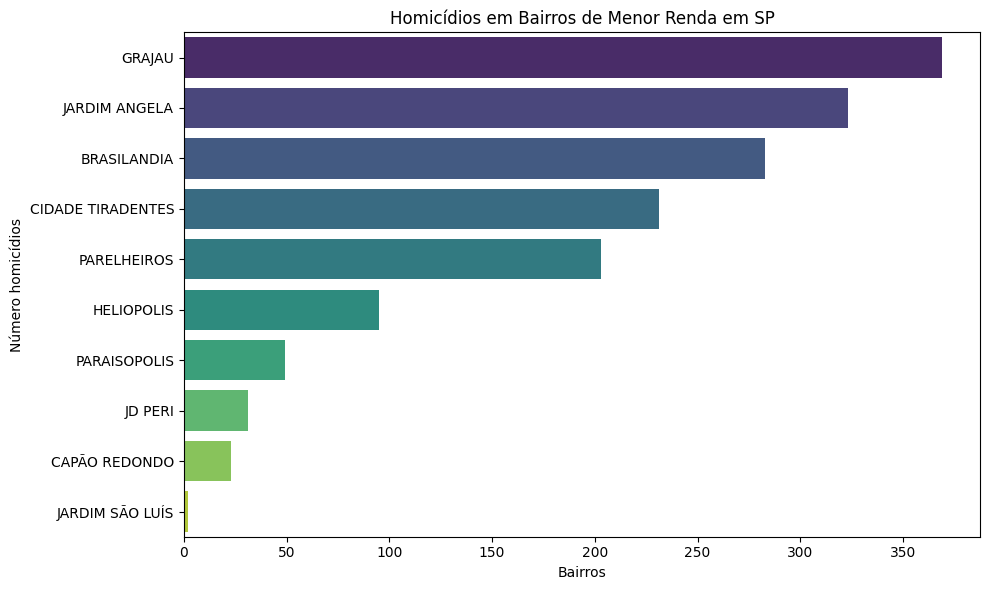

In [94]:
bairros_menor_renda_sp = [
    "Heliopolis",
    "Paraisopolis",
    "Cidade Tiradentes",
    "Jardim São Luís",
    "Grajau",
    "Capão Redondo",
    "Brasilandia",
    "JARDIM ANGELA",
    "Jd Peri",
    "Parelheiros"
]
menor_renda, homicidios_menor = maiuscula(bairros_menor_renda_sp)
soma_menor_renda = homicidios_menor["ANO"].sum()
# Gráfico homícidios bairros de menor renda
plt.figure(figsize=(10, 6))
sns.barplot(x=homicidios_menor["ANO"], y=homicidios_menor.index, data=homicidios_menor, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Número homicídios")
plt.title("Homicídios em Bairros de Menor Renda em SP")
plt.tight_layout()
plt.show()

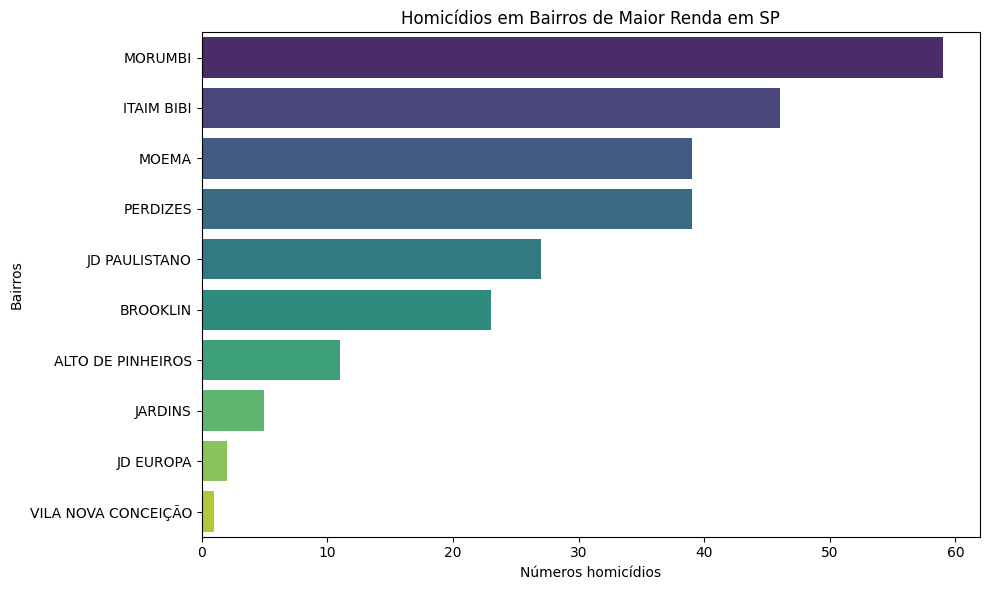

In [95]:
bairros_maior_renda_sp = [
    "Jd Europa",
    "Jd Paulistano",
    "Vila Nova Conceição",
    "Itaim Bibi",
    "Moema",
    "Morumbi",
    "Brooklin",
    "Alto de Pinheiros",
    "Perdizes",
    "Jardins"
]
maior_renda, homicidios_maior = maiuscula(bairros_maior_renda_sp)
soma_maior_renda = homicidios_maior["ANO"].sum()
# Gráfico homicídios maior renda em sp
plt.figure(figsize=(10, 6))
sns.barplot(x=homicidios_maior["ANO"], y=homicidios_maior.index, data=homicidios_maior, palette="viridis")
plt.xlabel("Números homicídios")
plt.ylabel("Bairros")
plt.title("Homicídios em Bairros de Maior Renda em SP")
plt.tight_layout()
plt.show()

In [ ]:
idade_hom = idade.groupby("IDADE").count().sort_values(by="NUM_BO", ascending=False)
sexo_hom = sexo.groupby("SEXO").count()
corcutis_hom = cor.groupby("CORCUTIS").count().sort_values(by="NUM_BO", ascending=False)

In [ ]:
correlacao_idade_sexo = idade.merge(sexo, how='inner').groupby(["SEXO", "IDADE"]).count().sort_values(by=["ANO_BO", "ANO_BO"], ascending=[False, True])
correlacao_cor_sexo = sexo.merge(cor, how='inner').groupby(["SEXO","CORCUTIS"]).count().sort_values(by=["ANO_BO", "ANO_BO"], ascending=[False, True])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices